Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [35]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd
from renamevars import renamevars
from scat_plt import scat_plt


In [12]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [6]:
# We will start by loading the parkinson dataset. The rest is up to you!
# df = pd.read_csv('parkinsons.data', 
  #               dtype = { # indicate categorical variables
   #                  'status': 'category'})
# df.head(5)

file_path = 'data/parkinsons.data'
df = pd.read_csv(file_path, 
                 dtype={  # indicate categorical variables
                     'status': 'category'
                 })

df.head(10)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


### 1. Cleaning and tidying the dataset

In [8]:
# check variable names, data type and number of observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null category
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null f

We observe that some variable names contain special characters like **':'**, **'%'** or **'('**. So we decide to rename them in order to avoid misunderstanding while writing our code. In order to complete the task, we call the function **'renamevars'**.

In [9]:
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}

df = renamevars(df, dict_names)
df.head()


,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


We observe that the column **name** contains more than one information, for example **phon_R01_S01_1**. In this codification, the last character is in reference to a given phonation trial, **S01** refers to the ID of the subject.
We can check if we find the strings **R01** and **phon** in every observation of the column **name**.

In [10]:
result1 = df['name'].str.contains('_R01_').all()
result2 = df['name'].str.contains('phon_').all()
print(f"The string _R01_ is contained in every obs of column name: {result1}")
print(f"The string phon_ is contained in every obs of column name: {result2}")

The string _R01_ is contained in every obs of column name: True
The string phon_ is contained in every obs of column name: True


We can then proceed to tidying the dataset, removing the strings **phon** and **R01** and dividing the column **name** into two columns: **<em>subject_id</em>** and **<em>trial</em>**.
Before to do this, we check if the column <em>name</em> is the **unique identifier** of the df.
</n>If so, we replace the existing index with a **multi-index** that will include the columns <em>subject_id</em> and <em>trial</em>. We do this because the dataset contains multiple records for a single subject, so we could not use only <em>subject_id</em> as an index.

In [11]:
df['name'].is_unique

True

In [12]:
# Divide column 'name' in new columns
aux = df['name'].str.split('_', expand=True)

# Drop the first two columns we don't need and rename the other two 
aux.drop(aux.columns[[0, 1]], axis=1, inplace=True)
aux.columns = ['subject_id', 'trial']

# Combinaning the new two columns with the original df
df = pd.concat([df, aux], axis=1)

# We set multi-index
df = df.set_index(['subject_id', 'trial'])

# Drop column 'name'
df = df.drop(columns=['name'])

df

avFF    maxFF    minFF  percJitter  absJitter      rap  \
subject_id trial                                                              
S01        1      119.992  157.302   74.997     0.00784    0.00007  0.00370   
           2      122.400  148.650  113.819     0.00968    0.00008  0.00465   
           3      116.682  131.111  111.555     0.01050    0.00009  0.00544   
           4      116.676  137.871  111.366     0.00997    0.00009  0.00502   
           5      116.014  141.781  110.655     0.01284    0.00011  0.00655   
           6      120.552  131.162  113.787     0.00968    0.00008  0.00463   
S02        1      120.267  137.244  114.820     0.00333    0.00003  0.00155   
           2      107.332  113.840  104.315     0.00290    0.00003  0.00144   
           3       95.730  132.068   91.754     0.00551    0.00006  0.00293   
           4       95.056  120.103   91.226     0.00532    0.00006  0.00268   
           5       88.333  112.240   84.072     0.00505    0.00006  0.00254   
           6       91.904  115.871   86.292     0.00540    0.00006  0.00281   
S04        1      136.926  159.866  131.276     0.00293    0.00002  0.00118   
           2      139.173  179.139   76.556     0.00390    0.00003  0.00165   
           3      152.845  163.305   75.836     0.00294    0.00002  0.00121   
           4      142.167  217.455   83.159     0.00369    0.00003  0.00157   
           5      144.188  349.259   82.764     0.00544    0.00004  0.00211   
           6      168.778  232.181   75.603     0.00718    0.00004  0.00284   
S05        1      153.046  175.829   68.623     0.00742    0.00005  0.00364   
           2      156.405  189.398  142.822     0.00768    0.00005  0.00372   
           3      153.848  165.738   65.782     0.00840    0.00005  0.00428   
           4      153.880  172.860   78.128     0.00480    0.00003  0.00232   
           5      167.930  193.221   79.068     0.00442    0.00003  0.00220   
           6      173.917  192.735   86.180     0.00476    0.00003  0.00221   
S06        1      163.656  200.841   76.779     0.00742    0.00005  0.00380   
           2      104.400  206.002   77.968     0.00633    0.00006  0.00316   
           3      171.041  208.313   75.501     0.00455    0.00003  0.00250   
           4      146.845  208.701   81.737     0.00496    0.00003  0.00250   
           5      155.358  227.383   80.055     0.00310    0.00002  0.00159   
           6      162.568  198.346   77.630     0.00502    0.00003  0.00280   
...                   ...      ...      ...         ...        ...      ...   
S42        1      236.200  244.663  102.137     0.00277    0.00001  0.00154   
           2      237.323  243.709  229.256     0.00303    0.00001  0.00173   
           3      260.105  264.919  237.303     0.00339    0.00001  0.00205   
           4      197.569  217.627   90.794     0.00803    0.00004  0.00490   
           5      240.301  245.135  219.783     0.00517    0.00002  0.00316   
           6      244.990  272.210  239.170     0.00451    0.00002  0.00279   
S43        1      112.547  133.374  105.715     0.00355    0.00003  0.00166   
           2      110.739  113.597  100.139     0.00356    0.00003  0.00170   
           3      113.715  116.443   96.913     0.00349    0.00003  0.00171   
           4      117.004  144.466   99.923     0.00353    0.00003  0.00176   
           5      115.380  123.109  108.634     0.00332    0.00003  0.00160   
           6      116.388  129.038  108.970     0.00346    0.00003  0.00169   
S44        1      151.737  190.204  129.859     0.00314    0.00002  0.00135   
           2      148.790  158.359  138.990     0.00309    0.00002  0.00152   
           3      148.143  155.982  135.041     0.00392    0.00003  0.00204   
           4      150.440  163.441  144.736     0.00396    0.00003  0.00206   
           5      148.462  161.078  141.998     0.00397    0.00003  0.00202   
           6      149.818  163.417  144.786     0.00336    0.00002  0.0

### 2. Basic EDA based on plots and descriptive statistics

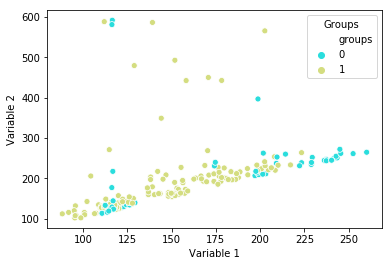

In [13]:
var1 = df['avFF']
var2 = df['maxFF']
groups= df['status']

# Call the function to create a scatter plot for fundamental frequency
scat_plt(var1, var2, groups)

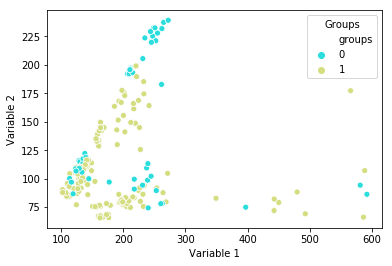

In [14]:
var1 = df['maxFF']
var2 = df['minFF']
groups= df['status']

# Call the function to create a scatter plot for fundamental frequency
scat_plt(var1, var2, groups)

In [40]:
# Calculate the correlation coefficients
correlation_1 = df["avFF"].corr(df["maxFF"])
correlation_2 = df["maxFF"].corr(df["minFF"])

# Scatter plots for Shimmer variables
scat_plt(df['lShimer'], df['dbShimer'], df['status'])
scat_plt(df['lShimer'], df['apq3'], df['status'])
scat_plt(df['lShimer'], df['apq5'], df['status'])
scat_plt(df['lShimer'], df['apq'], df['status'])
scat_plt(df['lShimer'], df['dda'], df['status'])

# Correlation matrix for Shimmer variables
shimmer_corr = df[['lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda']].corr()




Correlation between avFF and maxFF: 0.4009846762460626
Correlation between maxFF and minxFF: 0.0849512508257375


In [41]:
fundamental_freq_corr

,avFF,maxFF,minFF
avFF,1.000000,0.400985,0.596546
maxFF,0.400985,1.000000,0.084951
minFF,0.596546,0.084951,1.000000


In [42]:
### 3. Aggregating and transforming variables in the dataset

,absJitter,rap,ppq,ddp
absJitter,1.000000,0.922911,0.897778,0.922913
rap,0.922911,1.000000,0.957317,1.000000
ppq,0.897778,0.957317,1.000000,0.957319
ddp,0.922913,1.000000,0.957319,1.000000


In [43]:
shimmer_corr

,lShimer,dbShimer,apq3,apq5,apq,dda
lShimer,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626
dbShimer,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202
apq3,0.987625,0.963198,1.000000,0.960070,0.896645,1.000000
apq5,0.982835,0.973751,0.960070,1.000000,0.949146,0.960072
apq,0.950083,0.960977,0.896645,0.949146,1.000000,0.896647
dda,0.987626,0.963202,1.000000,0.960072,0.896647,1.000000


In [44]:
# Set the correlation threshold
correlation_threshold = 0.9

# Calculate the correlation matrix
corr_matrix = cleaned_df.corr()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than the threshold
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Drop the highly correlated features from the DataFrame
cleaned_df.drop(high_corr_columns, axis=1, inplace=True)

# Display the cleaned DataFrame
cleaned_df


avFF  absJitter  lShimer
subject_id trial                             
S01        1      119.992    0.00007  0.04374
           2      122.400    0.00008  0.06134
           3      116.682    0.00009  0.05233
           4      116.676    0.00009  0.05492
           5      116.014    0.00011  0.06425
           6      120.552    0.00008  0.04701
S02        1      120.267    0.00003  0.01608
           2      107.332    0.00003  0.01567
           3       95.730    0.00006  0.02093
           4       95.056    0.00006  0.02838
           5       88.333    0.00006  0.02143
           6       91.904    0.00006  0.02752
S04        1      136.926    0.00002  0.01259
           2      139.173    0.00003  0.01642
           3      152.845    0.00002  0.01828
           4      142.167    0.00003  0.01503
           5      144.188    0.00004  0.02047
           6      168.778    0.00004  0.03327
S05        1      153.046    0.00005  0.05517
           2      156.405    0.00005  0.03995
           3      153.848    0.00005  0.03810
           4      153.880    0.00003  0.04137
           5      167.930    0.00003  0.04351
           6      173.917    0.00003  0.04192
S06        1      163.656    0.00005  0.01659
           2      104.400    0.00006  0.03767
           3      171.041    0.00003  0.01966
           4      146.845    0.00003  0.01919
           5      155.358    0.00002  0.01718
           6      162.568    0.00003  0.01791
...                   ...        ...      ...
S42        1      236.200    0.00001  0.02448
           2      237.323    0.00001  0.01242
           3      260.105    0.00001  0.02030
           4      197.569    0.00004  0.02177
           5      240.301    0.00002  0.02018
           6      244.990    0.00002  0.01897
S43        1      112.547    0.00003  0.01358
           2      110.739    0.00003  0.01484
           3      113.715    0.00003  0.01472
           4      117.004    0.00003  0.01657
           5      115.380    0.00003  0.01503
           6      116.388    0.00003  0.01725
S44        1      151.737    0.00002  0.01469
           2      148.790    0.00002  0.01574
           3      148.143    0.00003  0.01450
           4      150.440    0.00003  0.02551
           5      148.462    0.00003  0.01831
           6      149.818    0.00002  0.02145
S49        1      117.226    0.00004  0.01909
           2      116.848    0.00005  0.01795
           3      116.286    0.00003  0.01564
           4      116.556    0.00004  0.01660
           5      116.342    0.00002  0.01300
           6      114.563    0.00003  0.01185
S50        1      201.774    0.00003  0.02574
           2      174.188    0.00003  0.04087
           3      209.516    0.00003  0.02751
           4      174.688    0.00008  0.02308
           5      198.764    0.00004  0.02296
           6      214.289    0.00003  0.01884

[195 rows x 3 columns]

In [46]:

# Add the desired columns to the cleaned_df DataFrame
cleaned_df[['NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']] = df[['NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']]

cleaned_df


avFF  absJitter  lShimer      NHR     HNR      RPDE  \
subject_id trial                                                           
S01        1      119.992    0.00007  0.04374  0.02211  21.033  0.414783   
           2      122.400    0.00008  0.06134  0.01929  19.085  0.458359   
           3      116.682    0.00009  0.05233  0.01309  20.651  0.429895   
           4      116.676    0.00009  0.05492  0.01353  20.644  0.434969   
           5      116.014    0.00011  0.06425  0.01767  19.649  0.417356   
           6      120.552    0.00008  0.04701  0.01222  21.378  0.415564   
S02        1      120.267    0.00003  0.01608  0.00607  24.886  0.596040   
           2      107.332    0.00003  0.01567  0.00344  26.892  0.637420   
           3       95.730    0.00006  0.02093  0.01070  21.812  0.615551   
           4       95.056    0.00006  0.02838  0.01022  21.862  0.547037   
           5       88.333    0.00006  0.02143  0.01166  21.118  0.611137   
           6       91.904    0.00006  0.02752  0.01141  21.414  0.583390   
S04        1      136.926    0.00002  0.01259  0.00581  25.703  0.460600   
           2      139.173    0.00003  0.01642  0.01041  24.889  0.430166   
           3      152.845    0.00002  0.01828  0.00609  24.922  0.474791   
           4      142.167    0.00003  0.01503  0.00839  25.175  0.565924   
           5      144.188    0.00004  0.02047  0.01859  22.333  0.567380   
           6      168.778    0.00004  0.03327  0.02919  20.376  0.631099   
S05        1      153.046    0.00005  0.05517  0.03160  17.280  0.665318   
           2      156.405    0.00005  0.03995  0.03365  17.153  0.649554   
           3      153.848    0.00005  0.03810  0.03871  17.536  0.660125   
           4      153.880    0.00003  0.04137  0.01849  19.493  0.629017   
           5      167.930    0.00003  0.04351  0.01280  22.468  0.619060   
           6      173.917    0.00003  0.04192  0.01840  20.422  0.537264   
S06        1      163.656    0.00005  0.01659  0.01778  23.831  0.397937   
           2      104.400    0.00006  0.03767  0.02887  22.066  0.522746   
           3      171.041    0.00003  0.01966  0.01095  25.908  0.418622   
           4      146.845    0.00003  0.01919  0.01328  25.119  0.358773   
           5      155.358    0.00002  0.01718  0.00677  25.970  0.470478   
           6      162.568    0.00003  0.01791  0.01170  25.678  0.427785   
...                   ...        ...      ...      ...     ...       ...   
S42        1      236.200    0.00001  0.02448  0.00620  24.078  0.469928   
           2      237.323    0.00001  0.01242  0.00533  24.679  0.384868   
           3      260.105    0.00001  0.02030  0.00910  21.083  0.440988   
           4      197.569    0.00004  0.02177  0.01337  19.269  0.372222   
           5      240.301    0.00002  0.02018  0.00965  21.020  0.371837   
           6      244.990    0.00002  0.01897  0.01049  21.528  0.522812   
S43        1      112.547    0.00003  0.01358  0.00435  26.436  0.413295   
           2      110.739    0.00003  0.01484  0.00430  26.550  0.369090   
           3      113.715    0.00003  0.01472  0.00478  26.547  0.380253   
           4      117.004    0.00003  0.01657  0.00590  25.445  0.387482   
           5      115.380    0.00003  0.01503  0.00401  26.005  0.405991   
           6      116.388    0.00003  0.01725  0.00415  26.143  0.361232   
S44        1      151.737    0.00002  0.01469  0.00570  24.151  0.396610   
           2      148.790    0.00002  0.01574  0.00488  24.412  0.402591   
           3      148.143    0.00003  0.01450  0.00540  23.683  0.398499   
           4      150.440    0.00003  0.02551  0.00611  23.133  0.352396   
           5      148.462    0.00003  0.01831  0.00639  22.866  0.408598   
           6      149.818    0.00002  0.02145  0.00595  23.008  0.329577   
S49        1      117.226    0.00004  0.01909  0.00955  23.079  0.603515   
           2      116.848    0.00005  0.01795  0.01179  22.085  0.663

### 3. Aggregating and transforming variables in the dataset

In [ ]:
#add codee
# merge 

In [ ]:
# your code here

### 4. Differentiating between controls (healthy subjects) and patients

In [ ]:
# your code here